In [8]:
import MDAnalysis as mda
import nglview as nv
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from distance import molDistance, filterDistance, PMF

In [9]:
CWD = os.getcwd()

In [10]:
os.listdir(CWD)

['.ipynb_checkpoints',
 '.prd-nojump.xtc_offsets.npz',
 'distance.py',
 'prd-nojump.xtc',
 'sc.gro',
 'trajectory.ipynb',
 '__pycache__']

In [11]:
u = mda.Universe('sc.gro','prd-nojump.xtc')

C:\Users\giannis\anaconda3\envs\ChemData\lib\site-packages\MDAnalysis\topology\base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)


In [12]:
view = nv.show_mdanalysis(u)
view.clear_representations()
view.add_unitcell()
view.add_ball_and_stick(selection='IBR and not hydrogen')
view.add_spacefill(selection='FBZ and not hydrogen',color='#dd7abf', sphereDetail=2)
view.camera = 'orthographic'

In [13]:
view.display()

NGLWidget(max_frame=100000)

In [14]:
# all solvent molecules
SOL = u.select_atoms('resname FBZ')

# all resids
resids = SOL.residues.resids

# settings for distance dataframe
start = 1
read_skip  = 5
# setting for PFM
threshold = 5.0
nbins     = 50
pfm_skip  = 1

# loop over all residues
resid = resids[0]

# select residue
SELECT = 'resid ' + str(resid)
# get atom group
SOL_atoms = SOL.select_atoms(SELECT)
# dataframe : time, COM_L2_nm
df = molDistance(u,SOL_atoms,start,read_skip)
# calculate PMF
dis = filterDistance(df,threshold,pfm_skip)
rc, fes = PMF(dis,nbins)

C:\Users\giannis\anaconda3\envs\ChemData\lib\site-packages\MDAnalysis\core\selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


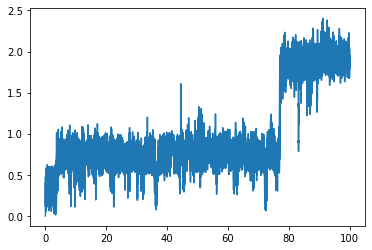

In [15]:
plt.plot(df['time'],df['COM_L2_nm'])

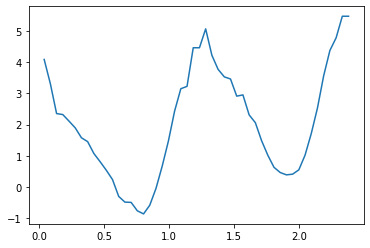

In [16]:
plt.plot(rc,fes)

In [58]:
ibr = u.select_atoms('resid 95')
view = nv.show_mdanalysis(ibr)
# view.clear_representations()
view.add_unitcell()
#view.add_ball_and_stick(selection='not hydrogen')
# view.add_spacefill(selection='FBZ and not hydrogen',color='#dd7abf', sphereDetail=2)
view.camera = 'orthographic'

C:\Users\giannis\anaconda3\envs\ChemData\lib\site-packages\MDAnalysis\core\selection.py:640: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


In [59]:
view.display()

NGLWidget(max_frame=100000)

In [ ]:
C66 O67 C68 C69
C76 C51 N50 C78
C56 C55 C63 C75

In [41]:
dih = ibr.select_atoms('name C66 O67 C68 C69')

torsion = np.zeros(len(u.trajectory[1::5]))
for indx, ts in enumerate(u.trajectory[1::5]):
    torsion[indx] = dih.dihedral.value()

C:\Users\giannis\anaconda3\envs\ChemData\lib\site-packages\MDAnalysis\core\selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


(array([0.00603487, 0.0051043 , 0.00375704, 0.00250006, 0.00172227,
        0.00169449, 0.00150004, 0.00212505, 0.00210422, 0.00217367,
        0.00230561, 0.00243062, 0.00247923, 0.00247923, 0.00232645,
        0.00248617, 0.00284729, 0.00329869, 0.0039376 , 0.0049654 ,
        0.00531263, 0.00577792, 0.00578487, 0.00602793, 0.00495846,
        0.00447233, 0.00347231, 0.00236812, 0.00170838, 0.00126392,
        0.00093058, 0.00100003, 0.00110419, 0.00113892, 0.00115281,
        0.00128475, 0.00117364, 0.00095141, 0.00075696, 0.00088891,
        0.00075696, 0.00084724, 0.00101391, 0.00152782, 0.00206255,
        0.0026459 , 0.00341675, 0.0048404 , 0.00569459, 0.00628488]),
 array([-1.79997511e+02, -1.72797693e+02, -1.65597874e+02, -1.58398056e+02,
        -1.51198237e+02, -1.43998419e+02, -1.36798600e+02, -1.29598782e+02,
        -1.22398964e+02, -1.15199145e+02, -1.07999327e+02, -1.00799508e+02,
        -9.35996898e+01, -8.63998713e+01, -7.92000529e+01, -7.20002344e+01,
        -6.480

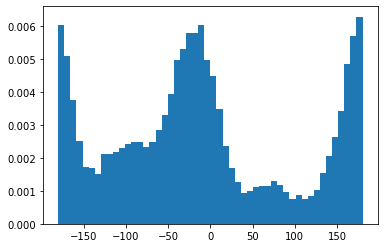

In [45]:
plt.hist(torsion,bins=50,density=True)

In [52]:
dih = ibr.select_atoms('name C56 C55 C63 C75')

torsion = np.zeros(len(u.trajectory[1::5]))
for indx, ts in enumerate(u.trajectory[1::5]):
    torsion[indx] = dih.dihedral.value()

(array([6.96225753e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.96225753e-06, 2.08867726e-05, 4.87358027e-05,
        6.96225753e-05, 1.25320635e-04, 2.36716756e-04, 4.17735452e-04,
        1.31586667e-03, 4.16343000e-03, 1.06592163e-02, 2.33583740e-02,
        3.60296827e-02, 3.39340432e-02, 1.99190188e-02, 7.12935171e-03,
        1.58739472e-03, 2.15829983e-04]),
 array([-179.94013339, -172.75855474, -165.5769761 , -158.39539745,
        -151.2138188 , -14

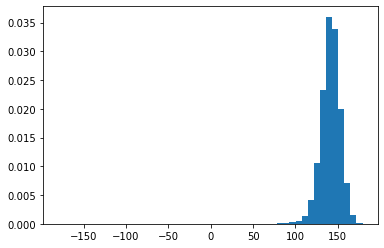

In [53]:
plt.hist(torsion,bins=50,density=True)

In [ ]:
plt.plot(rc,fes)

In [ ]:
data = {'time': time, 'COM_L2_nm': distance}
df = pd.DataFrame(data,)

In [ ]:
df

In [ ]:
resid1 = u.select_atoms('resid 1')
view = nv.show_mdanalysis(resid1)
view.clear_representations()
view.add_ball_and_stick(selection='IBR and not hydrogen')
view.camera = 'orthographic'

In [ ]:
view.display()

In [ ]:
# torsion angles of interest

# 1. C12O13C14C15
# 2. C22C8C9C10

In [ ]:
tau = u.select_atoms('resid 1 and name C12 O13 C14 C15')

In [ ]:
from MDAnalysis.analysis.dihedrals import Dihedral
from MDAnalysis.analysis.distances import dist

In [ ]:
tau.atoms.names

In [ ]:
tau.dihedral.value()

In [ ]:
omegas = [res for res in residues[5:10]]
dihs = dihedrals.Dihedral(omegas).run()

In [ ]:
u.select_atoms('name C12 O13 C14 C15')

In [ ]:
select = 'resid ' + str(residue.resid) + ' and name C12 O13 C14 C15'

In [ ]:
tau = u.select_atoms(select)

In [ ]:
tau.dihedral.value()

In [ ]:
for residue in u.residues:
    select = 'resid ' + str(residue.resid) + ' and name C12 O13 C14 C15'
    tau = u.select_atoms(select)
    print(residue.resid,tau.dihedral.value())

In [ ]:
ags = [u.select_atoms('name C12 O13 C14 C15') for res in u.residues[0:5]]
R = Dihedral(ags).run()

In [ ]:
u.residues.total_mass()

In [ ]:
for ts in u.trajectory:
    print(ts.dimensions)

In [ ]:
ts1 = u.trajectory[0]

In [ ]:
u.select_atoms('name C12 O13 C14 C15')

In [ ]:
from MDAnalysis.analysis import lineardensity as lin

In [ ]:
lin.LinearDensity(ts1.atoms,grouping='atoms').run

In [ ]:
u.

In [ ]:
# load the universe (unit cell)
u = mda.Universe('sc.gro')

In [ ]:
view = nv.show_mdanalysis(u)
view.clear_representations()
view.add_unitcell()
view.add_licorice(selection='IBR and not hydrogen')
view.add_surface(selection='ANI and not hydrogen',color='#dd7abf')
view.camera = 'orthographic'

In [ ]:
view.display()

In [ ]:
view.render_image()

In [ ]:
view.download_image(filename='sc.png', factor=15, trim=True)

In [ ]:
ANI = u.select_atoms('resname ANI')
view_ANI = nv.show_mdanalysis(ANI)
view_ANI

In [ ]:
ball = u.select_atoms('resname ANI and sphzone 20.0 resid 1023')
view_ball = nv.show_mdanalysis(ball)
view_ball

In [ ]:
selected_ANI = [str(i) for i in ball.resids]
selected_ANI = set(selected_ANI)

In [ ]:
seq = ''
for i in selected_ANI:
    seq += i + ' '

In [ ]:
SELECT = 'resid ' + seq[:-1]
test = u.select_atoms(SELECT)
view_test = nv.show_mdanalysis(test)

In [ ]:
view_test.clear_representations()
view_test.add_ball_and_stick(selection='ANI and not hydrogen')
view_test.camera = 'orthographic'

In [ ]:
view_test.display()

In [ ]:
view_test.render_image()

In [ ]:
view_test.download_image(filename='crop.png', factor=15, trim=True)

In [ ]:
exported      = u.select_atoms('all and not '+ SELECT)
exported.write('sc-vacancies.gro')

In [ ]:
view_exported = nv.show_mdanalysis(exported)
view_exported.clear_representations()
view_exported.add_unitcell()
view_exported.add_licorice(selection='IBR and not hydrogen',opacity=0.6)
view_exported.add_surface(selection='ANI and not hydrogen',color='#dd7abf')
view_exported.camera = 'orthographic'

In [ ]:
view_exported.display()

In [ ]:
view_exported.render_image()

In [ ]:
view_exported.download_image(filename='sc-vanancies.png', factor=15, trim=True)